In [1]:
import os
import re
import functools
import numpy as np
import pandas as pd
import pickle5 as pickle

In [2]:
# CURR_PATH = os.getcwd()
CURR_PATH = '/home/svetlanamaslenkova/Documents/AKI_deep/LSTM'
DATA_PATH = '/home/svetlanamaslenkova/Documents/data/physionet.org/files/mimiciv/2.0/'
DF_PATH = CURR_PATH +'/dataframes_2/'
# ED_PATH = DATA_PATH+'physionet.org/files/mimic-iv-ed/1.0/ed/'
PKL_PATH = CURR_PATH+'/pickles_2/'
DF_PATH = CURR_PATH+'/dataframes_2/'
ICU_PATH = DATA_PATH + 'icu/'
HOSP_PATH = DATA_PATH + 'hosp/'

# Import

In [127]:
with open(PKL_PATH + 'aki_stage_labels.pkl', 'rb') as f:
    aki_stage_labels = pickle.load(f)
aki_stage_labels.head()   

,subject_id,hadm_id,stay_id,specimen_id,day_id,icu_day_id,icu_12h_window_id,charttime,intime,AKI_1_scr,AKI_2_scr,AKI_3_scr,AKI_1_urine,AKI_2_urine,AKI_3_urine,AKI_1,AKI_2,AKI_3,ANY_AKI,NO_AKI
0,16788749,20000808,30610654,63232011.0,5,0,0,2180-01-18 01:54:00,2180-01-17 19:32:10,0,0,0,0.0,0.0,0.0,0,0,0,0,1
1,16788749,20000808,30610654,72894600.0,6,1,2,2180-01-19 03:36:00,2180-01-17 19:32:10,0,0,0,1.0,0.0,0.0,1,0,0,1,0
2,16003661,20001305,36916968,90355490.0,0,0,0,2178-03-25 13:45:00,2178-03-25 02:59:09,0,0,0,1.0,1.0,1.0,0,0,1,1,0
3,16003661,20001305,36916968,92318652.0,1,1,3,2178-03-27 02:12:00,2178-03-25 02:59:09,1,0,0,1.0,1.0,1.0,0,0,1,1,0
4,14577567,20001361,33475095,96321141.0,0,0,0,2143-05-05 04:27:00,2143-05-04 16:52:00,1,0,0,0.0,0.0,0.0,1,0,0,1,0


In [66]:
with open(PKL_PATH + 'aki_stage_labels_second_day.pkl', 'rb') as f:
    aki_stage_labels_second_day = pickle.load(f)
aki_stage_labels_second_day

,subject_id,hadm_id,stay_id,AKI_1,AKI_2,AKI_3,ANY_AKI,NO_AKI
0,18421337,22413411,30000484,0,0,0,0,1
1,12168737,29283664,30001336,0,0,0,0,1
2,34923988,59074770,30001471,0,0,0,0,1
3,13269859,26734917,30002521,0,0,0,0,1
4,15978672,26652960,30002654,1,0,0,1,0
...,...,...,...,...,...,...,...,...
33801,38093900,48704302,39998622,0,1,0,1,0
33802,15669140,29818488,39999172,0,0,0,0,1
33803,13651601,22584645,39999230,0,1,0,1,0
33804,15403458,25335698,39999562,0,0,0,0,1


In [57]:
with open(PKL_PATH + 'pid_demographics_icu.pkl', 'rb') as f:
    pid_demographics_icu =  pickle.load(f)
print('unique stays: ', pid_demographics_icu.stay_id.unique().shape[0])
pid_demographics_icu.head()

unique stays:  39293


,subject_id,hadm_id,admittime,dischtime,race,gender,age,stay_id,name_result_value,demographics
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,WHITE,F,52,NaN,NaN,WHITE F {52}
1,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,WHITE,F,52,NaN,NaN,WHITE F {52}
2,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,WHITE,F,52,NaN,NaN,WHITE F {52}
3,10000032,29079034.0,2180-07-23 12:35:00,2180-07-25 17:55:00,WHITE,F,52,39553978.0,Height {60} Blood Pressure {98/66} BMI {18...,WHITE F {52} Height {60} Blood Pressure {98/...
4,10000068,25022803.0,2160-03-03 23:16:00,2160-03-04 06:26:00,WHITE,F,19,NaN,NaN,WHITE F {19}


In [21]:
with open(PKL_PATH + 'chartevents_creatinine.pkl', 'rb') as f:
    chartevents_creatinine = pickle.load(f)

In [27]:
import pandas as pd

data_icustays = pd.read_csv(ICU_PATH + 'icustays.csv')

data_icustays.columns = data_icustays.columns.str.lower()

data_icustays.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588


In [28]:
data_icustays['hadm_id'] = data_icustays['hadm_id'].astype(int)
# change charttime column to datettime type
format_ = '%Y-%m-%d %H:%M:%S'
data_icustays['intime'] = pd.to_datetime(data_icustays['intime'], format=format_)
data_icustays['outtime'] = pd.to_datetime(data_icustays['outtime'], format=format_)

In [29]:
import pandas as pd

data_patients = pd.read_csv(HOSP_PATH+'patients.csv')

data_patients.columns = data_patients.columns.str.lower()

data_patients.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN


In [104]:
import pandas as pd

data_admissions = pd.read_csv(HOSP_PATH+'admissions.csv')

data_admissions.columns = data_admissions.columns.str.lower()

data_admissions.head(2)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0


In [105]:
data_admissions['hadm_id'] = data_admissions['hadm_id'].astype(int)
# change charttime column to datettime type
format_ = '%Y-%m-%d %H:%M:%S'
# data_vitals['charttime'] = pd.to_datetime(data_vitals['charttime'], format=format_)
data_admissions['admittime'] = pd.to_datetime(data_admissions['admittime'], format=format_)
data_admissions['dischtime'] = pd.to_datetime(data_admissions['dischtime'], format=format_)

# Whole cohort

In [107]:
print('n of unique patients: ', (data_icustays.subject_id.unique().shape[0]))
print('n of unique admissions: ', (data_icustays.hadm_id.unique().shape[0]))
print('n of unique ICU stays: : ', (data_icustays.stay_id.unique().shape[0]))

n of unique patients:  53569
n of unique admissions:  69639
n of unique ICU stays: :  76943


In [67]:
print('number of stays with aki status available from ICU wards: ', \
                    aki_stage_labels_second_day.stay_id.unique().shape[0])
g_adm = aki_stage_labels_second_day.groupby('stay_id').sum()
print('admissions with no AKI in ICU: ', g_adm[g_adm.ANY_AKI==0].index.shape[0])
print('admissions with AKI 1 in ICU: ', aki_stage_labels_second_day[aki_stage_labels_second_day.AKI_1==1].stay_id.unique().shape[0])
print('admissions with AKI 2 in ICU: ', aki_stage_labels_second_day[aki_stage_labels_second_day.AKI_2==1].stay_id.unique().shape[0])
print('admissions with AKI 3 in ICU: ', aki_stage_labels_second_day[aki_stage_labels_second_day.AKI_3==1].stay_id.unique().shape[0])

number of stays with aki status available from ICU wards:  33806
admissions with no AKI in ICU:  20100
admissions with AKI 1 in ICU:  6239
admissions with AKI 2 in ICU:  3560
admissions with AKI 3 in ICU:  3907


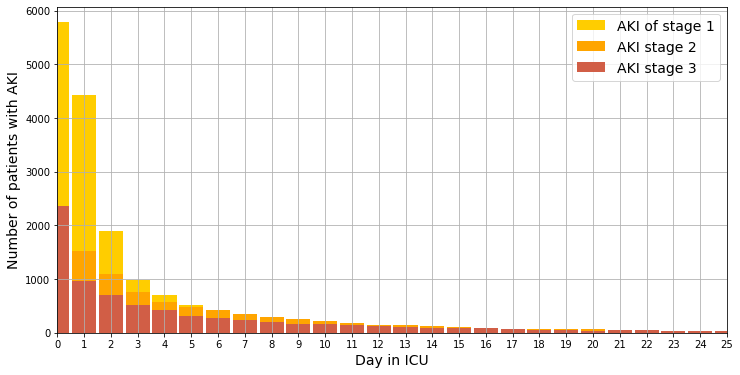

In [130]:
from turtle import color
from matplotlib import pyplot as plt
icu_aki_status = aki_stage_labels.copy()

g0 = icu_aki_status[(icu_aki_status.AKI_1==1)].sort_values(['hadm_id', 'icu_12h_window_id'])\
                        .drop_duplicates(['stay_id'], keep='first')\
                            .groupby('icu_day_id')\
                                .count()
index0 = g0.AKI_1.sort_values(ascending=False).index
values0 = g0.AKI_1.sort_values(ascending=False).values

g1 = icu_aki_status[(icu_aki_status.AKI_1==1)&(icu_aki_status.AKI_2==0)].sort_values(['hadm_id', 'icu_12h_window_id'])\
                        .drop_duplicates(['stay_id'], keep='first')\
                            .groupby('icu_day_id')\
                                .count()
index1 = g1.AKI_1.sort_values(ascending=False).index
values1 = g1.AKI_1.sort_values(ascending=False).values

g2 = icu_aki_status[(icu_aki_status.AKI_2==1)&(icu_aki_status.AKI_3==0)].sort_values(['hadm_id', 'icu_12h_window_id'])\
                        .drop_duplicates(['stay_id'], keep='first')\
                            .groupby('day_id')\
                                .count()
index2 = g2.AKI_2.sort_values(ascending=False).index
values2 = g2.AKI_2.sort_values(ascending=False).values

g3 = icu_aki_status[icu_aki_status.AKI_3==1].sort_values(['hadm_id', 'icu_12h_window_id'])\
                        .drop_duplicates(['stay_id'], keep='first')\
                            .groupby('day_id')\
                                .count()
index3 = g3.AKI_3.sort_values(ascending=False).index
values3 = g3.AKI_3.sort_values(ascending=False).values

fig, (ax2) = plt.subplots(1, 1, figsize=(12, 6), sharex=False) 

ax2.set_xticks(index1)
# ax2.set_yticks(np.arange(0, 3000, 100))
ax2.set_xlim([0,25])
ax2.set_xlabel('Day in ICU', fontsize = 14)
ax2.set_ylabel('Number of patients with AKI', fontsize = 14)
# ax2.bar(index0, values0, width=0.9, label='AKI of any stage')
ax2.bar(index1, values1, width=0.9, label='AKI of stage 1', color='#FFCD00')
ax2.bar(index2, values2, width=0.9, label='AKI stage 2', color='orange')
ax2.bar(index3, values3, width=0.9, label='AKI stage 3', color='#D15E46')
# ax2.set_title('Number of patients having AKI onset on a particular day of an ICU stay') 
ax2.grid(True)
ax2.legend( fontsize = 14)

plt.show()

0.0 110.23


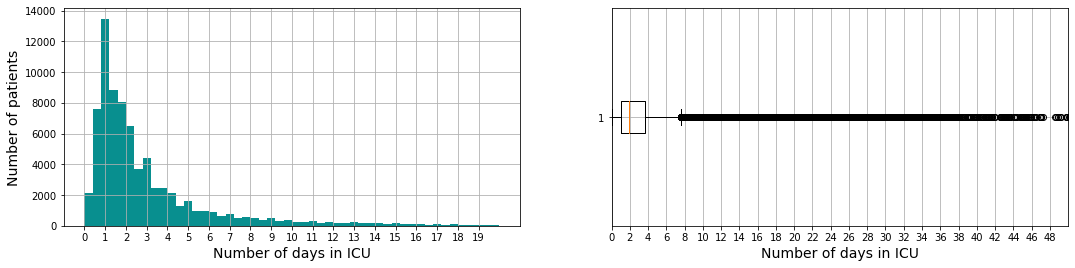

In [111]:
from matplotlib import pyplot as plt

print(np.round(data_icustays.los.min(),2) , np.round(data_icustays.los.max(), 2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4), sharex=False)
ax1.hist(data_icustays.los,  bins=50, range=(0,20),histtype ='bar', facecolor='#088F8F')
ax1.set_xticks(np.arange(0, 20))
ax1.set_xlabel('Number of days in ICU', fontsize=14)
ax1.set_ylabel('Number of patients', fontsize=14)
ax1.grid()

ax2.boxplot(data_icustays.los, vert=False)
ax2.set_xticks(np.arange(0, 50, 2 ))
ax2.set_xlim([0,50])
ax2.set_xlabel('Number of days in ICU', fontsize=14)
ax2.grid()

# fig.suptitle("Length of ICU stay", fontsize="x-large")

Creatinine on the first day in the ICU

In [55]:
fisrt_scr_icu = chartevents_creatinine.sort_values(['subject_id','hadm_id','stay_id','charttime'], ascending=True).drop_duplicates(['subject_id','hadm_id','stay_id'], keep='first').sort_values('value', ascending=True)
fisrt_scr_icu['valuenum'] =  fisrt_scr_icu['valuenum'].astype(float)
fisrt_scr_icu.head(1)

,subject_id,hadm_id,stay_id,charttime,itemid,value,valuenum,valueuom,label,abbreviation,category,unitname,param_type
928611,17341901,26732570,39786701,2142-10-09 15:30:00,220615,-0.1,-0.1,mg/dL,Creatinine (serum),Creatinine (serum),Labs,None,Numeric


In [54]:
fisrt_scr_icu.value.values

array(['-0.1', '0', '0', ..., '999999', '999999', '999999'], dtype=object)

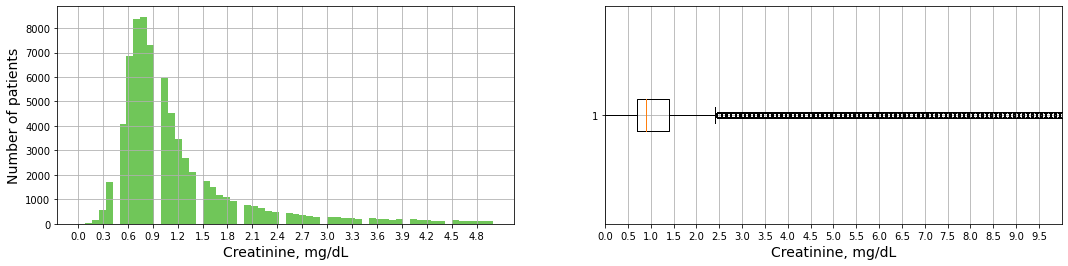

In [121]:
from turtle import width
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4), sharex=False)

ax1.hist(fisrt_scr_icu.valuenum,  bins=60, range=(0,5),  histtype ='bar', facecolor='#70C659')
ax1.set_xticks(np.arange(0, 5, 0.3))
ax1.set_xlabel('Creatinine, mg/dL', fontsize=14)
ax1.set_ylabel('Number of patients', fontsize=14)
ax1.grid()

ax2.boxplot(fisrt_scr_icu.valuenum, vert=False)
ax2.set_xticks(np.arange(0, 10, 0.5 ))
ax2.set_xlim([0,10])
ax2.set_xlabel('Creatinine, mg/dL', fontsize=14)
ax2.grid()

# Final cohort

In [3]:
with open(DF_PATH + 'pid_train_dataset_icu.pkl', 'rb') as f:
    pid_train_dataset_icu = pickle.load(f)

with open(DF_PATH + 'pid_test_dataset_icu.pkl', 'rb') as f:
    pid_test_dataset_icu = pickle.load(f)

with open(DF_PATH + 'pid_val_dataset_icu.pkl', 'rb') as f:
    pid_val_dataset_icu = pickle.load(f)

In [8]:
print('pid_train_dataset_icu: ', pid_train_dataset_icu.stay_id.unique().shape)
print('pid_test_dataset_icu: ', pid_test_dataset_icu.stay_id.unique().shape)
print('pid_val_dataset_icu: ', pid_val_dataset_icu.stay_id.unique().shape)

pid_train_dataset_icu:  (11425,)
pid_test_dataset_icu:  (1428,)
pid_val_dataset_icu:  (1429,)


In [73]:
LABELS_PATH = '/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/pickles_2/aki_stage_labels.pkl'

with open(LABELS_PATH, 'rb') as f:
    aki_stage_labels = pickle.load(f)

In [9]:
dataset = pd.concat([pid_train_dataset_icu, pid_test_dataset_icu, pid_val_dataset_icu])
stays = dataset.stay_id.unique()
len(stays)

14282

In [44]:
dataset.isna().sum()

subject_id                 0
hadm_id                    0
stay_id                    0
day_id                  5823
icu_12h_window_id          0
icu_day_id                 0
demographics               0
previous_diags_codes       0
previous_diags_names       0
vitals_names               0
vitals_codes               0
labs_names                 0
labs_codes                 0
outputs_names              0
outputs_codes              0
medications_names          0
medications_codes          0
AKI_1                      0
AKI_2                      0
AKI_3                      0
icu_12h_info_codes         0
icu_12h_info_names         0
dtype: int64

Get number of stays and ratioo of AKI

In [19]:
dataset = dataset[dataset.icu_day_id==1].sort_values(['AKI_1', 'AKI_2', 'AKI_3'], ascending=False).drop_duplicates('stay_id', keep='first')

In [ ]:
with open('/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/pickles_2/dataset_lstm_icu.pkl', 'wb') as f:
    pickle.dump(dataset, f, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
print(dataset.shape[0])
print('Ratio of patients with AKI_1: ', np.round((dataset.AKI_1==1).sum()/dataset.shape[0], 2))
print('Ratio of patients with AKI_2: ', np.round((dataset.AKI_2==1).sum()/dataset.shape[0], 2))
print('Ratio of patients with AKI_3: ', np.round((dataset.AKI_3==1).sum()/dataset.shape[0], 2))

14260
Ratio of patients with AKI_1:  0.09
Ratio of patients with AKI_2:  0.03
Ratio of patients with AKI_3:  0.01


In [47]:
data_patients[data_patients.subject_id.isin()]

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
315455,19999828,F,46,2147,2017 - 2019,NaN
315456,19999829,F,28,2186,2008 - 2010,NaN
315457,19999840,M,58,2164,2008 - 2010,2164-09-17
315458,19999914,F,49,2158,2017 - 2019,NaN


In [110]:
stays = dataset.stay_id.unique()
patients = data_icustays[data_icustays.stay_id.isin(stays)].subject_id.unique()
admissions = data_icustays[data_icustays.stay_id.isin(stays)].hadm_id.unique()
print(len(stays))
print(len(patients))
print(len(admissions))

14260
12810
13759


In [130]:
patients_df = data_patients[data_patients.subject_id.isin(patients)]
print('ratio of women: ', np.round(((patients_df.gender=='F').sum() / patients_df.shape[0]) , 2))
print('median length of stay: ', np.round(data_icustays[data_icustays.stay_id.isin(stays)].los.median(), 2))

ratio of women:  0.46
median length of stay:  3.4


In [123]:
data_demographics = pd.merge(data_admissions[['subject_id',	'hadm_id',	'admittime',	'dischtime', 'race']], \
                                data_patients[['subject_id',	'gender',	'anchor_age',	'anchor_year']], \
                                how='outer', on=['subject_id'])

In [124]:
# get age of patients at the time of an admission
data_demographics['age_of_birth'] = data_demographics['anchor_year'] - data_demographics['anchor_age']
data_demographics['age'] = [value.year for value in data_demographics['admittime']] - data_demographics['age_of_birth']

# drop unnecessary columns
data_demographics = data_demographics.drop(['anchor_age','anchor_year', 'age_of_birth'], axis=1)

data_demographics.age = data_demographics.age.fillna(-1)
data_demographics['age'] = data_demographics['age'].astype(int)

In [113]:
data_demographics = data_demographics[data_demographics.hadm_id.isin(admissions)]
data_demographics.head(2)

,subject_id,hadm_id,admittime,dischtime,race,gender,age
110,10002155,28994087.0,2130-09-23 21:59:00,2130-09-29 18:55:00,WHITE,F,82
121,10002348,22725460.0,2112-11-30 22:22:00,2112-12-10 17:56:00,WHITE,F,77


In [127]:
print('ratio of women: ', np.round(((data_demographics.gender=='F').sum() / data_demographics.shape[0]), 2))
print('median age: ', data_demographics.age.median())

ratio of women:  0.52
median age:  53.0


In [129]:
data_demographics.race.value_counts(normalize=True)*100

WHITE                                        63.239670
BLACK/AFRICAN AMERICAN                       13.909677
OTHER                                         3.492001
UNKNOWN                                       2.473345
HISPANIC/LATINO - PUERTO RICAN                1.890941
WHITE - OTHER EUROPEAN                        1.844279
HISPANIC OR LATINO                            1.815885
ASIAN                                         1.435099
ASIAN - CHINESE                               1.290929
WHITE - RUSSIAN                               1.168109
BLACK/CAPE VERDEAN                            1.106699
HISPANIC/LATINO - DOMINICAN                   1.017336
BLACK/CARIBBEAN ISLAND                        0.616520
BLACK/AFRICAN                                 0.589007
PATIENT DECLINED TO ANSWER                    0.406098
UNABLE TO OBTAIN                              0.370661
PORTUGUESE                                    0.344908
ASIAN - SOUTH EAST ASIAN                      0.336104
HISPANIC/L

In [91]:
aki_stage_labels = aki_stage_labels[aki_stage_labels.stay_id.isin(stays)&(aki_stage_labels.icu_day_id==1)]
aki_stage_labels.stay_id.unique().shape

(13128,)

In [98]:
def difference(lst1, lst2):
    lst3 = [value for value in lst1 if value not in lst2]
    #return lst3
    return lst3

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    #return lst3
    return lst3

In [97]:
difference(stays, aki_stage_labels.stay_id.unique())[0:5]

[32610785, 31532954, 36460006, 31122755, 39508268]

In [103]:
len(intersection(stays, aki_stage_labels.stay_id.unique()))

13128

In [104]:
labels1 = []
labels2 = []
labels3 = []
labels_no = []
for stay in intersection(stays, aki_stage_labels.stay_id.unique()):
    stay_labels = aki_stage_labels[(aki_stage_labels.stay_id==stay)&(aki_stage_labels.icu_day_id==1)]
    AKI_1_label = (np.sum(stay_labels.AKI_1.values) > 0).astype(int)
    AKI_2_label = (np.sum(stay_labels.AKI_2.values) > 0).astype(int)
    AKI_3_label = (np.sum(stay_labels.AKI_3.values) > 0).astype(int)
    AKI_NO_AKI_label = (np.sum(stay_labels.NO_AKI.values) > 0).astype(int)
    labels1.append(AKI_1_label)
    labels2.append(AKI_2_label)
    labels3.append(AKI_3_label)
    labels_no.append(AKI_NO_AKI_label)


In [106]:
print('AKI_1:   ', np.sum(labels1))
print('AKI_2:   ', np.sum(labels2))
print('AKI_3:   ', np.sum(labels3))
print('NO_AKI:  ', np.sum(labels_no))
print('\nsum:   ', np.sum(labels1)+np.sum(labels2)+np.sum(labels3)+np.sum(labels_no))

AKI_1:    1033
AKI_2:    451
AKI_3:    112
NO_AKI:   11731

sum:    13327
